# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

# 1. Problem defition
How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

# 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

# 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note**: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

# 4. Features
https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

## Importing Libraries for Data Cleaning and Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Import Data 
df = pd.read_csv("bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv",low_memory = False)

In [3]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [4]:
# Data Exploration

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [6]:
len(df.columns)

53

In [7]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275,...,6333305,6333314,6333330,6333339,6333343,6333344,6333345,6333347,6333348,6333349
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0,21000.0,27000.0,21500.0,65000.0,...,11500.0,13000.0,20500.0,13000.0,10000.0,10000.0,10500.0,12500.0,10000.0,13000.0
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474,...,1800259,1908162,1879923,1856845,1799614,1919201,1882122,1944213,1794518,1944743
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883,...,21437,21437,21446,21435,21435,21435,21436,21435,21435,21436
datasource,121,121,121,121,121,121,121,121,121,121,...,149,149,149,149,149,149,149,149,149,149


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [9]:
df["YearMade"]

0         2004
1         1996
2         2001
3         2001
4         2007
          ... 
412693    2005
412694    2005
412695    2005
412696    2006
412697    2006
Name: YearMade, Length: 412698, dtype: int64

In [10]:
df["saledate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 412698 entries, 0 to 412697
Series name: saledate
Non-Null Count   Dtype 
--------------   ----- 
412698 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


In [11]:
df["saledate"]

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

In [12]:
# Parse date
df = pd.read_csv("bluebook-for-bulldozers/bluebook-for-bulldozers/Train.csv",low_memory = False,parse_dates=["saledate"])

In [13]:
df["saledate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 401125 entries, 0 to 401124
Series name: saledate
Non-Null Count   Dtype         
--------------   -----         
401125 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.1 MB


<AxesSubplot:ylabel='Frequency'>

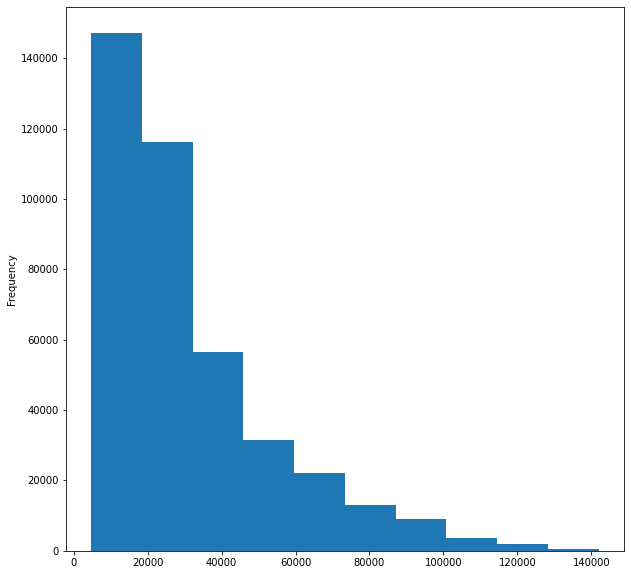

In [14]:
df["SalePrice"].plot.hist(figsize = (10,10))

<BarContainer object of 1000 artists>

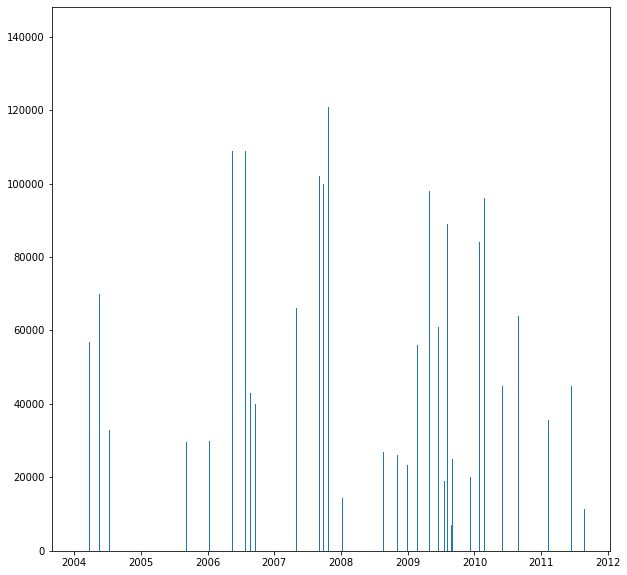

In [15]:
fig, ax = plt.subplots(figsize = (10,10))
ax.bar(df["saledate"][:1000],df["SalePrice"][:1000])

In [16]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [17]:
# Sort dataframe by salesdate

In [18]:
df.sort_values(by =["saledate"],ascending = True, inplace = True)

In [19]:
df.saledate.head(20)

205615   1989-01-17
92803    1989-01-31
98346    1989-01-31
169297   1989-01-31
274835   1989-01-31
75378    1989-01-31
81383    1989-01-31
134080   1989-01-31
55455    1989-01-31
55454    1989-01-31
114830   1989-01-31
54653    1989-01-31
238373   1989-01-31
98567    1989-01-31
113454   1989-01-31
92780    1989-01-31
113390   1989-01-31
127000   1989-01-31
92833    1989-01-31
32138    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [20]:
# Make a copy of original DataFrame

In [21]:
df_temp = df.copy()

In [22]:
df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98346,1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169297,1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
274835,1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393123,6260878,13500,1799594,4102,149,2.0,1000,NaN,NaN,2011-12-30,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
397987,6288376,9750,1872596,4875,149,2.0,1000,NaN,NaN,2011-12-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
392664,6258093,14500,1877553,3170,149,2.0,1988,NaN,NaN,2011-12-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400458,6315563,12500,1869637,26456,149,2.0,2010,NaN,NaN,2011-12-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


## Feature Engineering on Date Column

In [23]:
df_temp["YearofSale"]= df_temp.saledate.dt.year
df_temp["MonthofSale"]= df_temp.saledate.dt.month
df_temp["DayofSale"]= df_temp.saledate.dt.day
df_temp["saleDayofweek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayofyear"] = df_temp.saledate.dt.dayofyear


In [24]:
df_temp.head().T

,205615,92803,98346,169297,274835
SalesID,1646770,1404019,1415646,1596358,1821514
SalePrice,9500,24000,35000,19000,14000
MachineID,1126363,1169900,1262088,1433229,1194089
ModelID,8434,7110,3357,8247,10150
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1975,1978,1980
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


<BarContainer object of 1000 artists>

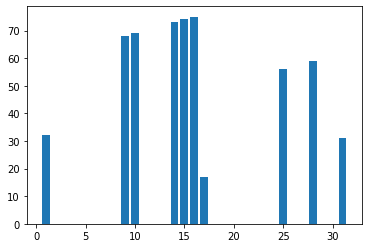

In [25]:
fig, ax = plt.subplots()
ax.bar(df_temp['DayofSale'][:1000], df_temp['saleDayofyear'][:1000])

In [26]:
df_temp[['DayofSale', 'saleDayofyear']]

,DayofSale,saleDayofyear
205615,17,17
92803,31,31
98346,31,31
169297,31,31
274835,31,31
...,...,...
393123,30,364
397987,30,364
392664,30,364
400458,30,364


In [27]:
# Delete Original Sale Date Column
df_temp.drop("saledate",axis = 1, inplace = True)

## Handling Missing Values

In [28]:
perc_missing = df_temp.isnull().sum()/len(df_temp)*100

In [29]:
perc_missing

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 5.019882
YearMade                     0.000000
MachineHoursCurrentMeter    64.408850
UsageBand                   82.639078
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.201558
fiModelSeries               85.812901
fiModelDescriptor           82.070676
ProductSize                 52.545964
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                73.982923
Enclosure                    0.081022
Forks                       52.115425
Pad_Type                    80.271985
Ride_Control                62.952696
Stick                       80.271985
Transmission                54.320972
Turbocharged

In [30]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   fiModelDesc               401125 non-null  object 
 10  fiBaseModel               401125 non-null  object 
 11  fiSecondaryDesc           263934 non-null  object 
 12  fiModelSeries             56908 non-null   object 
 13  fiModelDescriptor         71919 non-nul

In [31]:
df_temp["Ride_Control"]

205615                    NaN
92803                      No
98346                     NaN
169297    None or Unspecified
274835    None or Unspecified
                 ...         
393123                    NaN
397987    None or Unspecified
392664                     No
400458    None or Unspecified
400217                    NaN
Name: Ride_Control, Length: 401125, dtype: object

In [32]:
# Convert Object Data Type to Categorical Data Type

In [33]:
pd.api.types.is_string_dtype(df_temp["Steering_Controls"])

True

In [34]:
df_temp.items()

<generator object DataFrame.items at 0x0000027784912F90>

In [35]:
# To find Object Data Types
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [36]:
# Convert Object Data Type to Category
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [37]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  int64   
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              380989 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  142765 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  category
 12  fiModelSeries             56908 non-null   category
 13  fiModelDescriptor       

In [38]:
df_temp.state.cat.codes.value_counts()

8     63944
43    51682
4     29019
48    15955
9     14309
19    12965
23    12961
34    12190
5     11254
12    11209
29    10882
32    10404
42    10027
0      9997
37     9941
40     9794
2      9173
31     8604
6      8128
22     7734
24     6961
27     6693
17     6450
16     5278
18     5095
13     4086
3      3869
30     3529
45     2895
44     2801
28     2724
51     2668
47     2288
11     2018
36     1775
21     1763
52     1662
25     1327
35     1311
14     1215
50      746
26      722
15      659
7       509
1       430
33      410
20      328
46      300
41      203
10      118
39       82
38       36
49        2
dtype: int64

In [39]:
# Fill in missing numerical values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
YearofSale
MonthofSale
DayofSale
saleDayofweek
saleDayofyear


In [40]:
# Check numeric values with null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [41]:
# Fill numeric rows with the median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_temp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_temp[label] = content.fillna(content.median())

In [42]:
df_temp.head().T

,205615,92803,98346,169297,274835
SalesID,1646770,1404019,1415646,1596358,1821514
SalePrice,9500,24000,35000,19000,14000
MachineID,1126363,1169900,1262088,1433229,1194089
ModelID,8434,7110,3357,8247,10150
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1975,1978,1980
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,416,12G,644,A66


In [43]:
df_temp["Coupler"].isnull()

205615     True
92803      True
98346      True
169297    False
274835    False
          ...  
393123     True
397987    False
392664     True
400458    False
400217    False
Name: Coupler, Length: 401125, dtype: bool

In [44]:
# Check if theres any null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [45]:
# No null Values

In [46]:
# Filling Null Categorical values
# Find Categorical values
for label,content in df_temp.items():
    if pd.api.types.is_categorical_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [47]:
# Encode categorical values and fill null values
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add binary column to indicate missing
        df_temp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_temp[label] = pd.Categorical(content).codes+1  

In [48]:
df_temp.T

,205615,92803,98346,169297,274835,75378,81383,134080,55455,55454,...,394193,393175,393211,397995,400034,393123,397987,392664,400458,400217
SalesID,1646770,1404019,1415646,1596358,1821514,1363540,1379228,1491298,1305337,1305336,...,6267284,6261027,6261568,6288403,6311722,6260878,6288376,6258093,6315563,6312170
SalePrice,9500,24000,35000,19000,14000,22500,31000,46000,17000,17000,...,11000,27000,10000,18000,11500,13500,9750,14500,12500,11000
MachineID,1126363,1169900,1262088,1433229,1194089,1413842,1082797,1322436,1517075,1236263,...,872857,434680,1891153,1908296,1847105,1799594,1872596,1877553,1869637,1812622
ModelID,8434,7110,3357,8247,10150,7267,7620,4107,3356,3356,...,108,3538,4089,26287,9580,4102,4875,3170,26456,9580
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,True,True,True,True,False,True,True,...,False,True,False,True,True,False,True,True,True,True
Blade_Type_is_missing,False,True,True,True,True,True,True,False,True,True,...,False,True,False,True,True,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True,True,True,False,True,True,...,False,True,False,True,True,False,True,True,True,True
Differential_Type_is_missing,True,True,True,False,False,False,False,True,True,True,...,True,True,True,True,True,True,False,True,False,True


In [49]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 400217
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(2), int16(4), int64(11), int8(40)
memory usage: 86.9 MB


In [50]:
df_temp.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Split Data into Train and Validation

In [51]:
df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500,1126363,8434,132,18.0,1974,0.0,0,4537,...,True,True,True,True,True,False,False,False,True,True
92803,1404019,24000,1169900,7110,132,99.0,1986,0.0,0,735,...,True,True,True,True,True,True,True,True,True,True
98346,1415646,35000,1262088,3357,132,99.0,1975,0.0,0,82,...,True,True,True,True,True,True,True,True,True,True
169297,1596358,19000,1433229,8247,132,99.0,1978,0.0,0,1158,...,True,True,True,True,True,True,True,True,False,False
274835,1821514,14000,1194089,10150,132,99.0,1980,0.0,0,1800,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393123,6260878,13500,1799594,4102,149,2.0,1000,0.0,0,2137,...,True,True,True,True,True,False,False,False,True,True
397987,6288376,9750,1872596,4875,149,2.0,1000,0.0,0,945,...,True,True,True,True,True,True,True,True,False,False
392664,6258093,14500,1877553,3170,149,2.0,1988,0.0,0,1057,...,True,True,True,True,True,True,True,True,True,True
400458,6315563,12500,1869637,26456,149,2.0,2010,0.0,0,3267,...,True,True,True,True,True,True,True,True,False,False


According to the Kaggle data page, the validation set and test set are split according to dates.

This makes sense since we're working on a time series problem.

E.g. using past events to try and predict future events.

Knowing this, randomly splitting our data into train and test sets using something like train_test_split() wouldn't work.

Instead, we split our data into training, validation and test sets using the date each sample occured.

In our case:

* Training = all samples up until 2011
* Valid = all samples form January 1, 2012 - April 30, 2012
* Test = all samples from May 1, 2012 - November 2012

In [52]:
df_temp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=103)

In [53]:
df_temp["YearofSale"].tail()

393123    2011
397987    2011
392664    2011
400458    2011
400217    2011
Name: YearofSale, dtype: int64

In [54]:
df_temp["YearofSale"].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: YearofSale, dtype: int64

<AxesSubplot:>

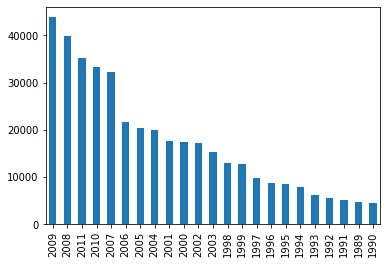

In [55]:
df_temp["YearofSale"].value_counts().plot.bar()

In [56]:
# Train
df_temp_val = df_temp[df_temp["YearofSale"]==2011]
df_temp_train = df_temp[df_temp["YearofSale"]!= 2011]

In [57]:
df_temp_val

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
8815,1168983,17500,58414,3538,121,3.0,1997,2637.0,2,738,...,True,True,True,True,True,True,True,True,True,True
20500,1210607,28500,131526,1177,121,3.0,1000,9153.0,3,557,...,False,False,False,False,False,True,True,True,True,True
20330,1210016,14000,1056736,16764,121,3.0,2006,213.0,2,1821,...,True,True,True,True,True,True,True,True,True,True
180848,1613603,21000,1266905,4581,132,3.0,1997,0.0,0,341,...,False,False,False,False,False,True,True,True,True,True
187073,1622760,9500,1193645,4631,132,3.0,1990,0.0,0,696,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393123,6260878,13500,1799594,4102,149,2.0,1000,0.0,0,2137,...,True,True,True,True,True,False,False,False,True,True
397987,6288376,9750,1872596,4875,149,2.0,1000,0.0,0,945,...,True,True,True,True,True,True,True,True,False,False
392664,6258093,14500,1877553,3170,149,2.0,1988,0.0,0,1057,...,True,True,True,True,True,True,True,True,True,True
400458,6315563,12500,1869637,26456,149,2.0,2010,0.0,0,3267,...,True,True,True,True,True,True,True,True,False,False


In [58]:
df_temp_train

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500,1126363,8434,132,18.0,1974,0.0,0,4537,...,True,True,True,True,True,False,False,False,True,True
92803,1404019,24000,1169900,7110,132,99.0,1986,0.0,0,735,...,True,True,True,True,True,True,True,True,True,True
98346,1415646,35000,1262088,3357,132,99.0,1975,0.0,0,82,...,True,True,True,True,True,True,True,True,True,True
169297,1596358,19000,1433229,8247,132,99.0,1978,0.0,0,1158,...,True,True,True,True,True,True,True,True,False,False
274835,1821514,14000,1194089,10150,132,99.0,1980,0.0,0,1800,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37748,1275828,13000,1533633,3112,132,16.0,1999,0.0,0,188,...,True,True,True,True,True,True,True,True,True,True
360802,2496021,15000,1429283,3112,149,16.0,2001,2361.0,3,188,...,True,True,True,True,True,True,True,True,True,True
360254,2482911,11000,1923723,6270,149,16.0,1000,0.0,0,4161,...,True,True,True,True,True,True,True,True,True,True
373739,2698005,24000,1791379,22666,149,16.0,1997,0.0,0,2183,...,True,True,True,True,True,False,False,False,True,True


In [59]:
X_train, y_train = df_temp_train.drop("SalePrice", axis = 1), df_temp_train["SalePrice"]
X_val, y_val = df_temp_val.drop("SalePrice", axis = 1), df_temp_val["SalePrice"]


In [60]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((365928, 102), (365928,), (35197, 102), (35197,))

## Building Evaluation Function

According to Kaggle for the Bluebook for Bulldozers competition, the evaluation function they use is root mean squared log error (RMSLE).

Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.

We can do this by taking the square root of Scikit-Learn's mean_squared_log_error (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

In [61]:
# Import Mean Squared Log Error from Scikit Learn
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error

In [62]:
# Create RMSLE Function
def RMSLE(y_test,y_preds):
    return np.sqrt (mean_squared_log_error(y_test,y_preds))

In [63]:
# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": RMSLE(y_train, train_preds),
              "Valid RMSLE": RMSLE(y_val, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_val, y_val)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)

Retraing an entire model would take far too long to continuing experimenting as fast as we want to.

So what we'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

In [64]:
#import Estimator
from sklearn.ensemble import RandomForestRegressor

In [65]:
# Instatiate model
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)

In [66]:
# Fit model
model.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1)

Setting max_samples to 10000 means every n_estimator (default 100) in our RandomForestRegressor will only see 10000 random samples from our DataFrame instead of the entire 400,000.

In other words, we'll be looking at 40x less samples which means we'll get faster computation speeds but we should expect our results to worsen (simple the model has less samples to learn patterns from).

In [67]:
show_scores(model)

{'Training MAE': 5470.221721841456,
 'Valid MAE': 6862.5585924936795,
 'Training RMSLE': 0.2562504454641138,
 'Valid RMSLE': 0.2856947784205119,
 'Training R^2': 0.8623394862707536,
 'Valid R^2': 0.8198256290501662}

## Hyperparameter tuning with RandomizedSearchCV
You can increase n_iter to try more combinations of hyperparameters but in our case, we'll try 20 and see where it gets us.

In [68]:
# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [69]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

In [70]:
rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [71]:
show_scores(rs_model)

{'Training MAE': 5962.433037674983,
 'Valid MAE': 7247.571683985851,
 'Training RMSLE': 0.2739539551454517,
 'Valid RMSLE': 0.29598218598505255,
 'Training R^2': 0.8347098211846383,
 'Valid R^2': 0.7936670360756334}

In [72]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [73]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: total: 12min 57s
Wall time: 2min 25s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [74]:
show_scores(ideal_model)

{'Training MAE': 2910.3969487587106,
 'Valid MAE': 5756.155735371555,
 'Training RMSLE': 0.14389636095547528,
 'Valid RMSLE': 0.23955380880022814,
 'Training R^2': 0.9594705382669589,
 'Valid R^2': 0.8677312907263242}

## Make predictions on test data


Our model is trained on data prior to 2011. However, the test data is from May 1 2012 to November 2012.

In [75]:
df_test = pd.read_csv("bluebook-for-bulldozers/bluebook-for-bulldozers/Test.csv")

In [76]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,5/3/2012 0:00,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,5/10/2012 0:00,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,5/10/2012 0:00,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,5/10/2012 0:00,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,5/10/2012 0:00,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,10/24/2012 0:00,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,10/24/2012 0:00,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,10/24/2012 0:00,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,10/24/2012 0:00,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [77]:
df_test.shape

(12457, 52)

In [79]:
df_temp["YearofSale"]

205615    1989
92803     1989
98346     1989
169297    1989
274835    1989
          ... 
393123    2011
397987    2011
392664    2011
400458    2011
400217    2011
Name: YearofSale, Length: 401125, dtype: int64

In [80]:
df_test = pd.read_csv("bluebook-for-bulldozers/bluebook-for-bulldozers/Test.csv", parse_dates= ['saledate'])

In [82]:
df_test["saledate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12457 entries, 0 to 12456
Series name: saledate
Non-Null Count  Dtype         
--------------  -----         
12457 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 97.4 KB


In [83]:
df_test.sort_values(by =["saledate"],ascending = True, inplace = True)

In [84]:
ideal_model.predict(df_test)

c:\users\mayow\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Medium'

## Preprocessing the Test Data

Our model has been trained on data formatted in the same way as the training data.

This means in order to make predictions on the test data, we need to take the same steps we used to preprocess the training data to preprocess the test data.

In [86]:
# Create Function to Preprocess Data
def preprocess_data(df):
    # Feature Engineering on Date Column
    df["YearofSale"]= df.saledate.dt.year
    df["MonthofSale"]= df.saledate.dt.month
    df["DayofSale"]= df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    # Delete Original Sale Date Column
    df.drop("saledate",axis = 1, inplace = True)

    # Convert Object Data Type to Category
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
        
   
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells if the data was missing our not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median since it's more robust than the mean
                df[label] = content.fillna(content.median())
            
    # Encode categorical values and fill null values
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            #Add binary column to indicate missing
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1  

In [91]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,True
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,True
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,True
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,True,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,6620191,2272921,9518,172,1,2005,3525.0,0,423,154,...,True,True,True,True,True,True,True,True,True,True
9936,6620142,2297127,9579,172,1,2008,3525.0,0,1675,676,...,True,True,True,True,True,True,True,True,True,True
11620,6635116,1412453,2160,149,1,2002,3525.0,0,1722,702,...,False,False,False,False,False,True,True,True,True,True
9995,6621460,2554811,13316,149,1,2003,3525.0,0,936,341,...,False,False,False,False,False,True,True,True,True,True


## Predict

In [92]:
ideal_model.predict(df_test)

c:\users\mayow\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing

  warnings.warn(message, FutureWarning)


ValueError: X has 101 features, but RandomForestRegressor is expecting 102 features as input.

In [93]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4537,1735,...,True,True,True,True,True,False,False,False,True,True
92803,1404019,1169900,7110,132,99.0,1986,0.0,0,735,243,...,True,True,True,True,True,True,True,True,True,True
98346,1415646,1262088,3357,132,99.0,1975,0.0,0,82,19,...,True,True,True,True,True,True,True,True,True,True
169297,1596358,1433229,8247,132,99.0,1978,0.0,0,1158,349,...,True,True,True,True,True,True,True,True,False,False
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1800,557,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37748,1275828,1533633,3112,132,16.0,1999,0.0,0,188,64,...,True,True,True,True,True,True,True,True,True,True
360802,2496021,1429283,3112,149,16.0,2001,2361.0,3,188,64,...,True,True,True,True,True,True,True,True,True,True
360254,2482911,1923723,6270,149,16.0,1000,0.0,0,4161,1490,...,True,True,True,True,True,True,True,True,True,True
373739,2698005,1791379,22666,149,16.0,1997,0.0,0,2183,702,...,True,True,True,True,True,False,False,False,True,True


In [94]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,True
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,True
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,True
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,True,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,6620191,2272921,9518,172,1,2005,3525.0,0,423,154,...,True,True,True,True,True,True,True,True,True,True
9936,6620142,2297127,9579,172,1,2008,3525.0,0,1675,676,...,True,True,True,True,True,True,True,True,True,True
11620,6635116,1412453,2160,149,1,2002,3525.0,0,1722,702,...,False,False,False,False,False,True,True,True,True,True
9995,6621460,2554811,13316,149,1,2003,3525.0,0,936,341,...,False,False,False,False,False,True,True,True,True,True


**X_train has 102 columns while df_test has 101 columns,**

**Lets find the missing column**

In [95]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [96]:
df_test["auctioneerID_is_missing"]

KeyError: 'auctioneerID_is_missing'

Since there is no auctioneerID_is_missing column we would append this column to df_test, then fill it with False

In [97]:
df_test["auctioneerID_is_missing"] = False

In [98]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,False
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,False
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,False
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,False,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,6620191,2272921,9518,172,1,2005,3525.0,0,423,154,...,True,True,True,True,True,True,True,True,True,False
9936,6620142,2297127,9579,172,1,2008,3525.0,0,1675,676,...,True,True,True,True,True,True,True,True,True,False
11620,6635116,1412453,2160,149,1,2002,3525.0,0,1722,702,...,False,False,False,False,True,True,True,True,True,False
9995,6621460,2554811,13316,149,1,2003,3525.0,0,936,341,...,False,False,False,False,True,True,True,True,True,False


## Now Predict

In [100]:
ideal_model.predict(df_test)

c:\users\mayow\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([18514.35758253, 21127.98185264, 29212.60197834, ...,
       41095.36899632, 41582.91911776, 30212.14245134])

In [104]:
test_preds = ideal_model.predict(df_test)

c:\users\mayow\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [113]:
df_test_preds = pd.DataFrame()
df_test_preds["SalesID"] = df_test["SalesID"]
df_test_preds["SalePrice"] = test_preds

In [114]:
df_test_preds

,SalesID,SalePrice
1408,4317459,18514.357583
1023,4249784,21127.981853
1728,4392603,29212.601978
1167,4274831,30828.047476
1594,4362801,17697.896866
...,...,...
9941,6620191,22021.000240
9936,6620142,25615.469872
11620,6635116,41095.368996
9995,6621460,41582.919118


In [115]:
df_test_preds[df_test_preds["SalesID"] == 1227829]

,SalesID,SalePrice
0,1227829,22001.338278


In [117]:
df_test_preds[df_test_preds["SalesID"] == 1227847]

,SalesID,SalePrice
2,1227847,49063.801256


In [119]:
df_test_preds.to_csv("Bulldozer_Result")

## Feature Importance

In [120]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.64681159e-02, 1.90317265e-02, 4.59140033e-02, 1.56834394e-03,
       3.45380314e-03, 2.01924373e-01, 2.81405138e-03, 9.18039429e-04,
       5.09136974e-02, 4.76585122e-02, 6.82812752e-02, 4.45377223e-03,
       1.74097884e-02, 1.47713893e-01, 4.29314407e-02, 5.98165738e-03,
       2.58501452e-03, 2.86695277e-03, 3.53799972e-03, 5.56475935e-02,
       3.49596718e-04, 5.93535177e-05, 9.16262337e-04, 1.70121319e-04,
       1.36311637e-03, 2.97556144e-05, 2.48876952e-04, 8.34717701e-03,
       1.36736421e-03, 2.74016309e-04, 2.60201400e-03, 2.42056750e-03,
       3.48281900e-03, 5.02017492e-04, 3.54570911e-04, 9.43798978e-03,
       8.48237012e-04, 9.55616212e-03, 1.48572883e-03, 1.00051545e-03,
       8.20137162e-04, 9.79201200e-04, 2.00905690e-03, 5.97015038e-04,
       6.45705097e-04, 3.98789560e-04, 3.00702416e-04, 2.26451566e-03,
       8.12233190e-04, 3.53772070e-04, 2.30299864e-04, 7.61600312e-02,
       3.96464666e-03, 5.66353354e-03, 2.91812893e-03, 1.02905916e-02,
      

In [121]:

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

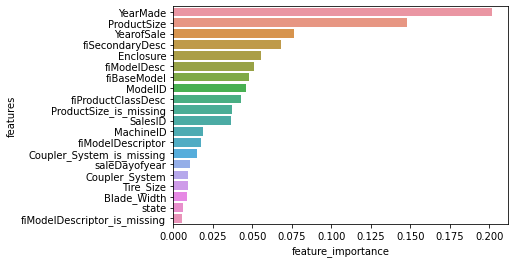

In [122]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [123]:
sum(ideal_model.feature_importances_)

1.0000000000000002

In [125]:
df["ProductSize"].value_counts()

Medium            62274
Large / Medium    49678
Small             26494
Mini              24840
Large             20975
Compact            6089
Name: ProductSize, dtype: int64